In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

from scipy import stats

In [8]:
a1 = pd.read_csv('음주운전 관련 데이터/가해자_음주정도별_주야별_교통사고_2005-2018.csv')
display(a1)

,1당음주정도별(1),1당음주정도별(2),주야별(1),2005,2005.1,2005.2,2005.3,2005.4,2005.5,2005.6,...,2018.29,2018.30,2018.31,2018.32,2018.33,2018.34,2018.35,2018.36,2018.37,2018.38
0,1당음주정도별(1),1당음주정도별(2),주야별(1),전체,전체,전체,1월,1월,1월,2월,...,9월,10월,10월,10월,11월,11월,11월,12월,12월,12월
1,1당음주정도별(1),1당음주정도별(2),주야별(1),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),...,부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명)
2,음주운전,0.05%~0.09%,주,1104,58,2120,95,2,172,77,...,194,119,4,197,103,3,179,118,3,177
3,음주운전,0.05%~0.09%,야,2885,103,5131,245,9,439,268,...,440,257,9,408,267,9,436,304,5,519
4,음주운전,0.10%~0.14%,주,1546,69,2775,123,4,216,101,...,248,153,4,269,133,0,248,112,0,197
5,음주운전,0.10%~0.14%,야,6457,175,11848,532,11,1004,510,...,770,498,4,812,403,6,688,422,8,704
6,음주운전,0.15%~0.199%,주,1581,51,2831,94,0,176,95,...,205,109,2,190,76,1,130,69,0,108
7,음주운전,0.15%~0.199%,야,7042,209,12904,462,20,862,442,...,556,347,6,595,214,1,339,212,6,354
8,음주운전,0.20%~0.249%,주,808,36,1380,40,1,71,37,...,82,40,0,68,39,0,64,22,0,40
9,음주운전,0.20%~0.249%,야,3227,131,5942,170,12,296,177,...,204,89,2,147,78,0,146,60,2,112


In [28]:
a2 = a1[['1당음주정도별(1)','1당음주정도별(2)','주야별(1)','2010','2011','2012','2013','2014','2015','2016','2017','2018']]

# 연도 열 목록
year_cols = ['2010','2011','2012','2013','2014','2015','2016','2017','2018']

# 혈줄알콜농도를 모두 합쳐준다
subset = a2.iloc[2:17].copy()

# 숫자형으로 변환
subset[year_cols] = subset[year_cols].apply(pd.to_numeric, errors='coerce')

# 주, 야 두개로 나눠 모두 합쳐주고 출력한다.
result = subset.groupby('주야별(1)')[year_cols].sum().reset_index()
display(result)

,주야별(1),2010,2011,2012,2013,2014,2015,2016,2017,2018
0,야,22185,21966,22413,20273,18203,18427,14792,14343,14278
1,주,6028,6056,6269,5946,5580,5688,4780,4939,4817


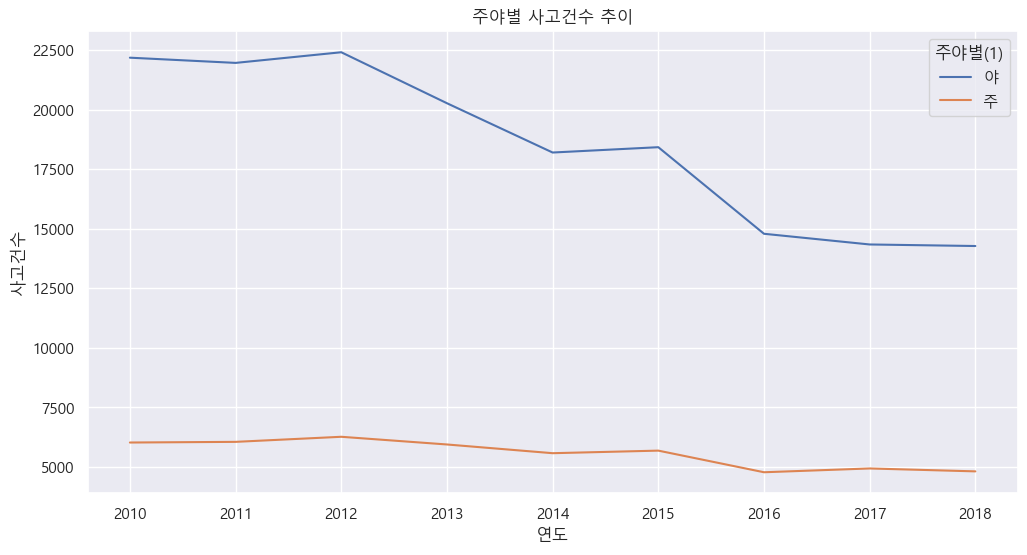

In [54]:
#result를 long format으로 변환
df_long = result.melt(id_vars='주야별(1)', var_name='연도', value_name='사고건수')

# 연도 컬럼을 숫자형으로 변환
df_long['연도'] = df_long['연도'].astype(int)

sns.lineplot(data=df_long, x='연도', y='사고건수', hue='주야별(1)',)

plt.title('주야별 사고건수 추이')
plt.show()

In [56]:
b1 = pd.read_csv('음주운전 관련 데이터/가해자_음주정도별_주야별_교통사고_2019-2023.csv')
display(b1)

,1당음주정도별(1),1당음주정도별(2),주야별(1),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,...,2023.29,2023.30,2023.31,2023.32,2023.33,2023.34,2023.35,2023.36,2023.37,2023.38
0,1당음주정도별(1),1당음주정도별(2),주야별(1),전체,전체,전체,1월,1월,1월,2월,...,9월,10월,10월,10월,11월,11월,11월,12월,12월,12월
1,1당음주정도별(1),1당음주정도별(2),주야별(1),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),...,부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명),사고건수 (건),사망자수 (명),부상자수 (명)
2,음주운전,0.03~0.049%,주,214,4,374,-,-,-,-,...,53,25,0,48,25,2,45,31,0,45
3,음주운전,0.03~0.049%,야,243,8,350,-,-,-,-,...,62,44,1,64,38,0,61,47,1,69
4,음주운전,0.05%~0.079%,주,903,30,1524,98,1,164,83,...,112,44,0,66,59,1,102,62,2,99
5,음주운전,0.05%~0.079%,야,2032,47,3316,224,6,353,217,...,177,92,2,124,98,0,160,114,1,164
6,음주운전,0.08%~0.149%,주,1501,21,2475,76,1,135,92,...,187,108,0,183,133,2,225,130,1,214
7,음주운전,0.08%~0.149%,야,5092,52,8383,349,2,604,314,...,433,279,2,447,370,8,556,457,6,743
8,음주운전,0.15%~0.199%,주,873,11,1448,55,0,80,33,...,103,53,1,80,53,0,86,56,1,95
9,음주운전,0.15%~0.199%,야,2896,58,4895,157,5,268,137,...,369,198,3,312,176,4,259,215,0,355


In [58]:
b2 = b1[['1당음주정도별(1)','1당음주정도별(2)','주야별(1)','2019','2020','2021','2022','2023']]

# 연도 열 목록
year_cols1 = ['2019','2020','2021','2022','2023']

# 혈줄알콜농도를 모두 합쳐준다
subset1 = b2.iloc[2:18].copy()

# 숫자형으로 변환
subset1[year_cols1] = subset1[year_cols1].apply(pd.to_numeric, errors='coerce')

# 주, 야 두개로 나눠 모두 합쳐주고 출력한다.
result1 = subset1.groupby('주야별(1)')[year_cols1].sum().reset_index()
display(result1)

,주야별(1),2019,2020,2021,2022,2023
0,야,11385,12660,11148,11054.0,9174
1,주,3992,4117,3362,3627.0,3520


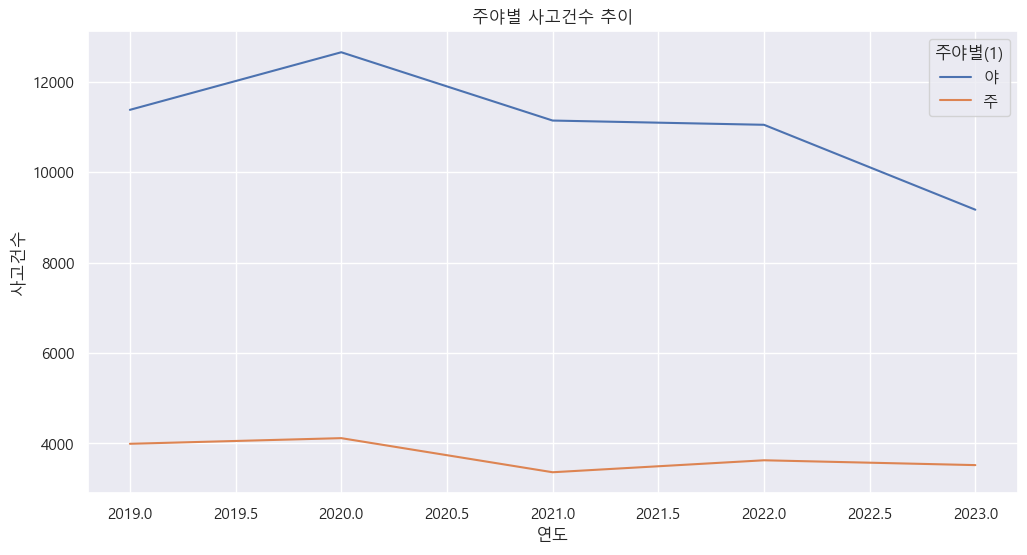

In [62]:
#result를 long format으로 변환
df_long1 = result1.melt(id_vars='주야별(1)', var_name='연도', value_name='사고건수')

# 연도 컬럼을 숫자형으로 변환
df_long1['연도'] = df_long1['연도'].astype(int)

sns.lineplot(data=df_long1, x='연도', y='사고건수', hue='주야별(1)',)

plt.title('주야별 사고건수 추이')
plt.show()

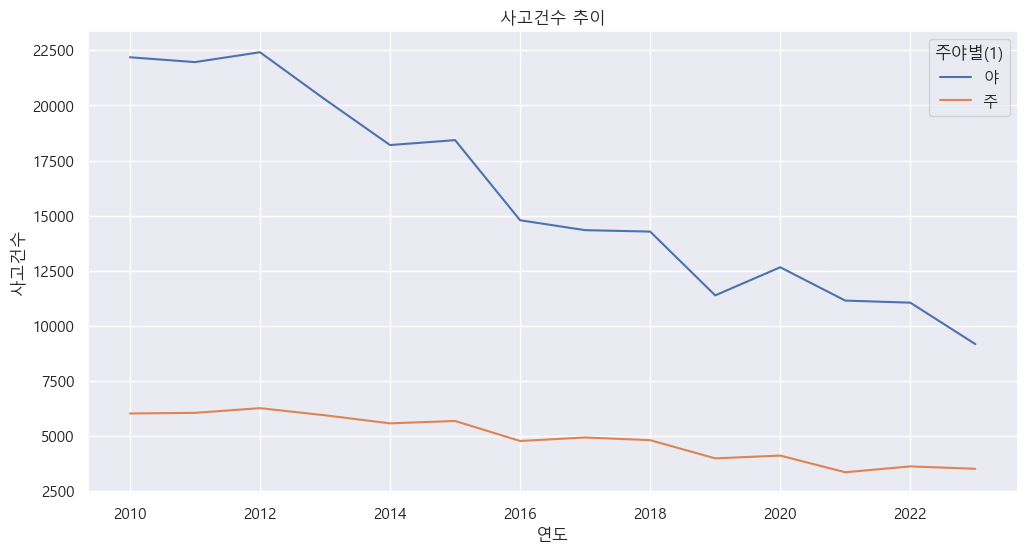

In [66]:
# 두 데이터 합치기 (concat)
df_all = pd.concat([df_long, df_long1], ignore_index=True)

# 그래프 그리기
sns.lineplot(data=df_all, x='연도', y='사고건수', hue='주야별(1)')

plt.title('사고건수 추이')
plt.show()